<a href="https://colab.research.google.com/github/anayx1/anayx1.github.io/blob/master/fake_new_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libs

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

DATA PROCESSING

In [5]:
news_dataset = pd.read_csv('/content/drive/Shareddrives/Unlimited Storage (1)/train.csv')

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
news_dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
news_dataset = news_dataset.fillna('')
# replacing the null values with empty string


In [10]:
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
# merging the author name and news title


In [11]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [12]:

X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
# separating the data & label

In [13]:
print(X)
print(Y)

          id  ...                                            content
0          0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1          1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2          2  ...  Consortiumnews.com Why the Truth Might Get You...
3          3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4          4  ...  Howard Portnoy Iranian woman jailed for fictio...
...      ...  ...                                                ...
20795  20795  ...  Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796  20796  ...  Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797  20797  ...  Michael J. de la Merced and Rachel Abrams Macy...
20798  20798  ...  Alex Ansary NATO, Russia To Hold Parallel Exer...
20799  20799  ...            David Swanson What Keeps the F-35 Alive

[20800 rows x 5 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 2080

Stemming



In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [17]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [18]:
X = news_dataset['content'].values
Y = news_dataset['label'].values
#separating the data and label

In [19]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [20]:
print(Y)

[1 0 1 ... 0 1 1]


In [21]:
Y.shape

(20800,)

In [26]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [29]:
text = ""
for i in range(len(X)):
  text = text+str((X[i]))

print(text)

darrel lucu hous dem aid even see comey letter jason chaffetz tweetdaniel j flynn flynn hillari clinton big woman campu breitbartconsortiumnew com truth might get firejessica purkiss civilian kill singl us airstrik identifihoward portnoy iranian woman jail fiction unpublish stori woman stone death adulteridaniel nussbaum jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbartlife life luxuri elton john favorit shark pictur stare long transcontinent flightalissa j rubin beno hamon win french socialist parti presidenti nomin new york timeexcerpt draft script donald trump q ampa black church pastor new york timemegan twohey scott shane back channel plan ukrain russia courtesi trump associ new york timeaaron klein obama organ action partner soro link indivis disrupt trump agendachri tomlinson bbc comedi sketch real housew isi caus outragamando flavio russian research discov secret nazi militari base treasur hunter arctic photojason ditz us offici s

In [30]:
text

'darrel lucu hous dem aid even see comey letter jason chaffetz tweetdaniel j flynn flynn hillari clinton big woman campu breitbartconsortiumnew com truth might get firejessica purkiss civilian kill singl us airstrik identifihoward portnoy iranian woman jail fiction unpublish stori woman stone death adulteridaniel nussbaum jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbartlife life luxuri elton john favorit shark pictur stare long transcontinent flightalissa j rubin beno hamon win french socialist parti presidenti nomin new york timeexcerpt draft script donald trump q ampa black church pastor new york timemegan twohey scott shane back channel plan ukrain russia courtesi trump associ new york timeaaron klein obama organ action partner soro link indivis disrupt trump agendachri tomlinson bbc comedi sketch real housew isi caus outragamando flavio russian research discov secret nazi militari base treasur hunter arctic photojason ditz us offici 

In [35]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

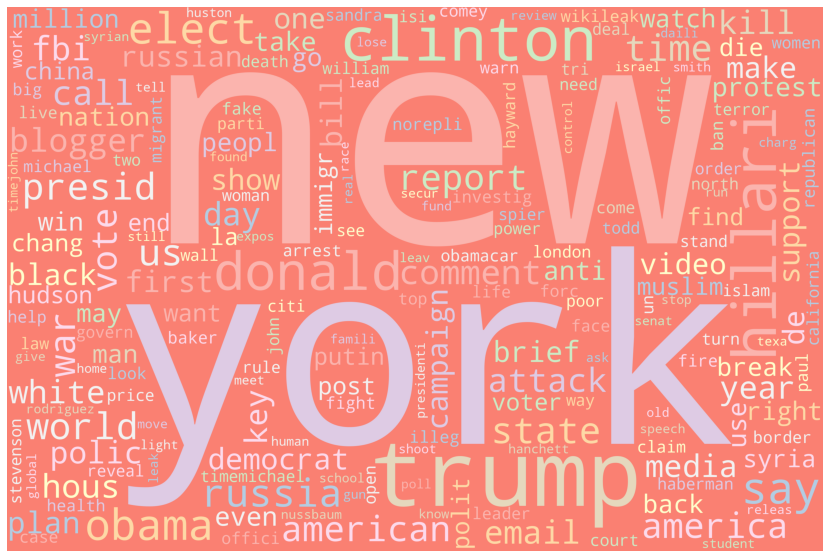

In [53]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [37]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
# converting the textual data to numerical data


In [38]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

spliting dataset (test and  train)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training Model: Logistic Regression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [44]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [45]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [48]:
print(Y_test[3])

0


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

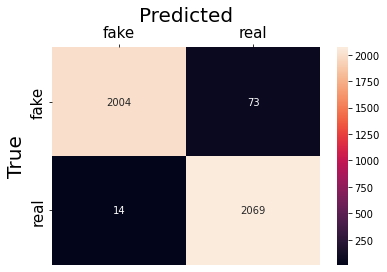

In [52]:
cm = confusion_matrix(y_true=Y_test, y_pred=X_test_prediction)

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['fake', 'real'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['fake', 'real'], fontsize = 15)
plt.show()
